In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

# Introduction to k-Means Clustering

The goal of $k$-means is to partition the data into $k$ clusters that minimize the within-cluster variance (i.e. the squared distances between each point in a cluster and their corresponding centroid).

The algorithm can be summarized as follows:

1. Pick a number for $k$.  We must provide this number - the algorithm itself will not attempt to identify how many clusters exist in our data.
2. Initialize a set of $k$ "centroids" (there are several ways one might approach this)
3. Label each data point according to which centroid it is closest to.
4. For each cluster, compute the center of mass (i.e., average position of the data points within the cluster), and move the centroid to that position
5. Go back to step 3 and repeat, until some stopping criteria is reached (e.g., the centroids are no longer moving, or the classification for each point is no longer changing)

The idea here is that although the "centroids" start as essentially random points, they will eventually become the centers of mass of each of the clusters in our data.



We'll begin by writing our own algorithm!

In [2]:
import numpy as np

from sklearn.datasets import make_blobs as mb

In [16]:
# generate some random data with two features and 3 different classes
data = mb(n_samples=120,n_features=2,centers=3, random_state=1693)

In [ ]:
data

In [ ]:
data[0].shape

(120, 2)

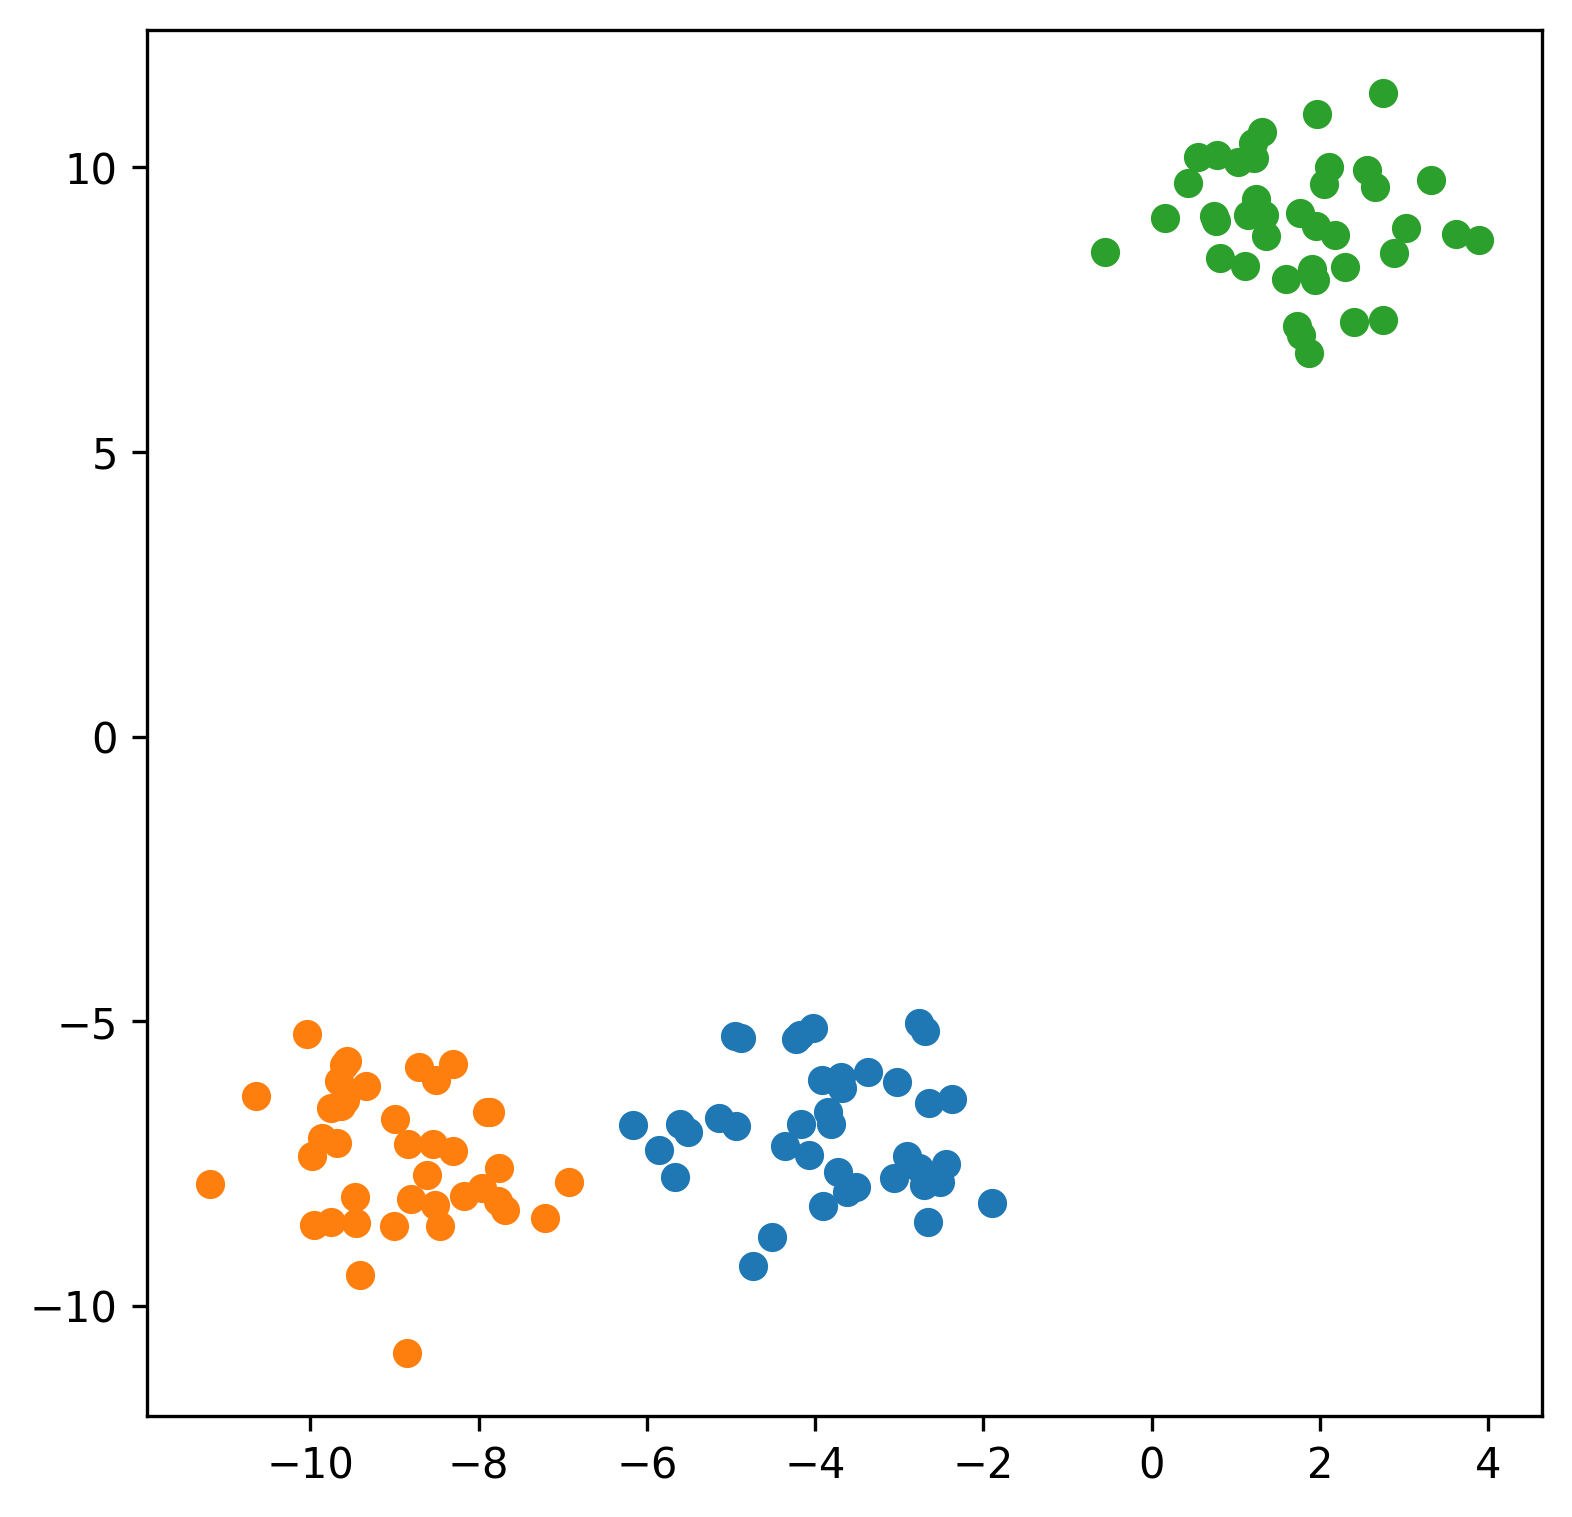

In [17]:
points = data[0]
y = data[1]
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(points[y==0,0],points[y==0,1])
ax.scatter(points[y==1,0],points[y==1,1])
ax.scatter(points[y==2,0],points[y==2,1])
plt.show()

In [44]:
X = data[0]
y = data[1] # our algorithm will not have access to y information
num = 3
# here we pick some random position of the centroids within the range of the features
ranges = np.array([[np.min(X[:,0]),np.max(X[:,0])],[np.min(X[:,1]),np.max(X[:,1])]])
# we initialize the centroids raandomly within the actual range of the data
r = np.random.RandomState(123)
centroids = 1.3*r.uniform(ranges[:,0],ranges[:,1],size=(num, ranges.shape[1]))

In [8]:
ranges

array([[-7.57158427,  7.72320805],
       [-6.62676579,  8.0729403 ]])

In [45]:
centroids

array([[ -0.89385683,  -5.83510629],
       [-10.09706204,   1.79367557],
       [ -0.44312485,  -1.894725  ]])

(-13.0, 12.0)

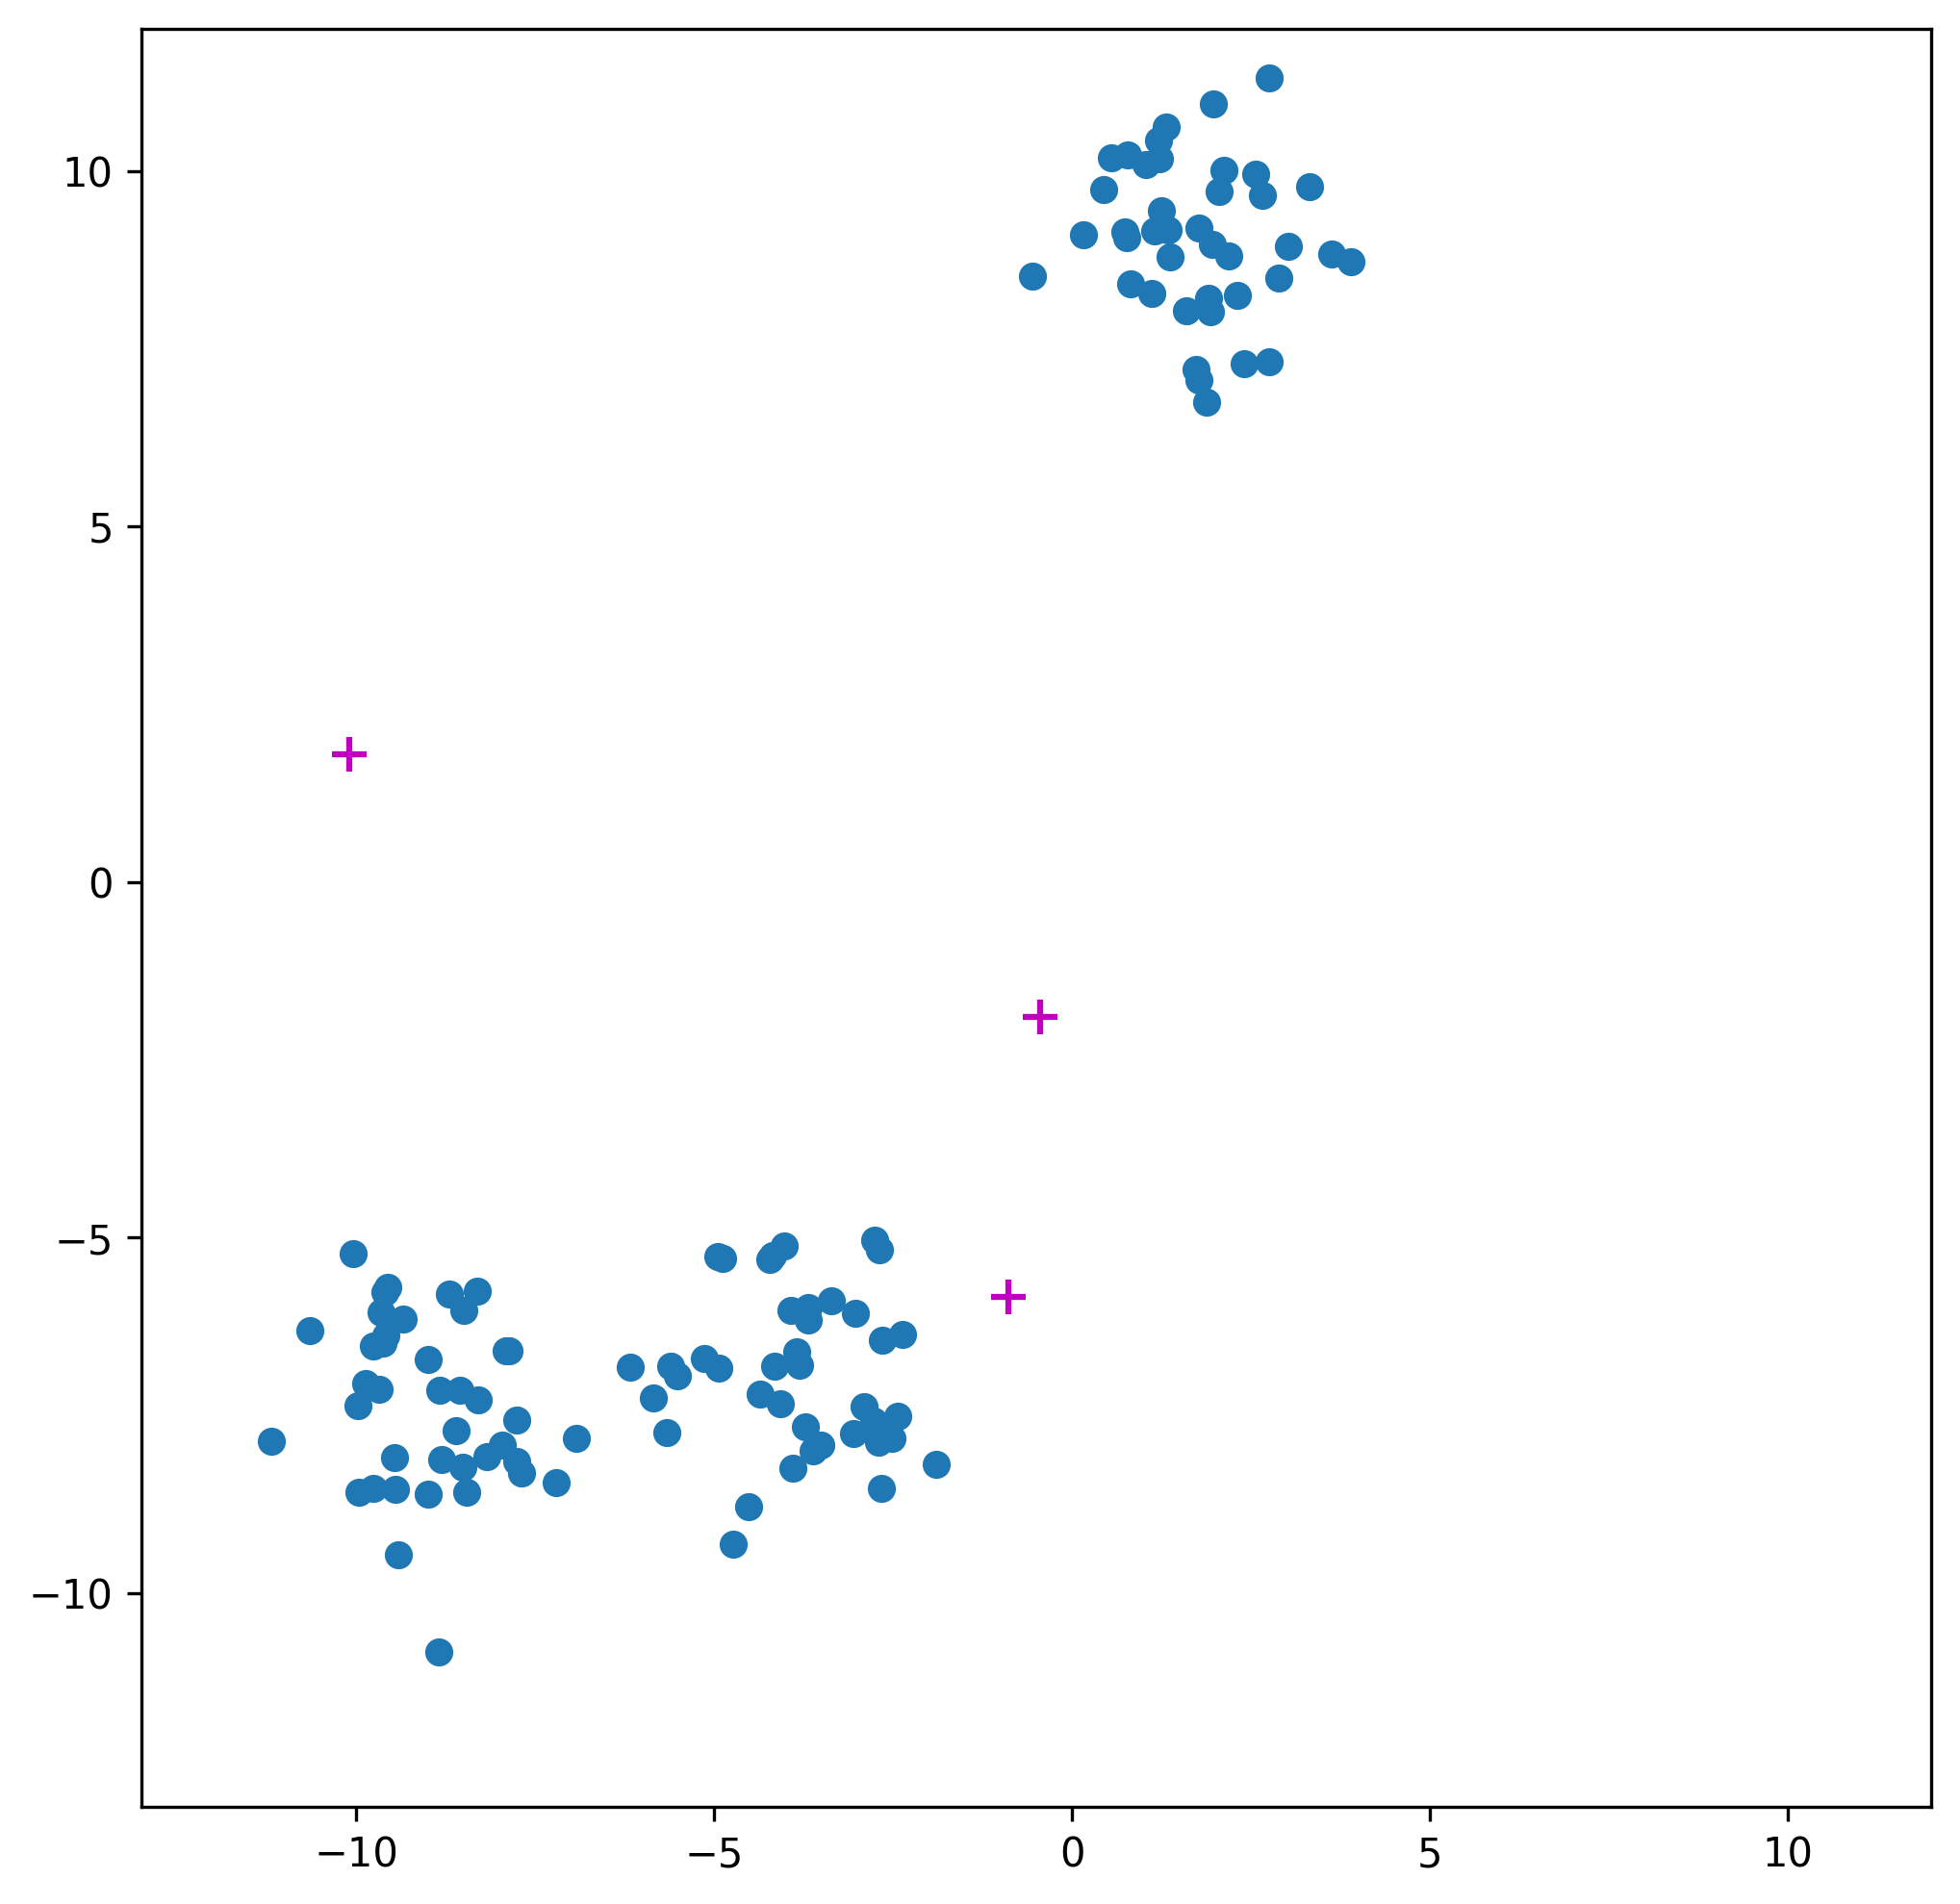

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1])
ax.scatter(centroids[:,0],centroids[:,1],marker='+',s=75,color='m')
ax.set_xlim(np.floor(np.min(X))-1,np.floor(np.max(X))+1)
ax.set_ylim(np.floor(np.min(X))-1,np.floor(np.max(X))+1)

In [ ]:
centroids

The Euclidean distance between two points of coordinates $(x_1,y_1)$ and $(x_2,y_2)$:
$$\large
\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}
$$

### Compute the Euclidean distance between centroids and the points

In [47]:
d = []
for c in centroids:
  d.append(np.sqrt(np.sum((X-c)**2,axis=1)))

In [ ]:
d # these are the distances from every data point to the centroids

In [ ]:
d[0].shape

(120,)

In [48]:
#Here we assign the clusters
clusters = np.argmin(d,axis = 0)

In [49]:
clusters

array([1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2])

In [50]:
def show_plot(X,clusters,centroids):
  fig, ax = plt.subplots(figsize=(6,6))
  ax.set_xlim(np.floor(np.min(X))-2,np.floor(np.max(X))+2)
  ax.set_ylim(np.floor(np.min(X))-2,np.floor(np.max(X))+2)
  for i in np.unique(clusters):
    ax.scatter(X[clusters==i,0],X[clusters==i,1])
  ax.scatter(centroids[:,0],centroids[:,1],marker='+',s=60, color='darkmagenta')


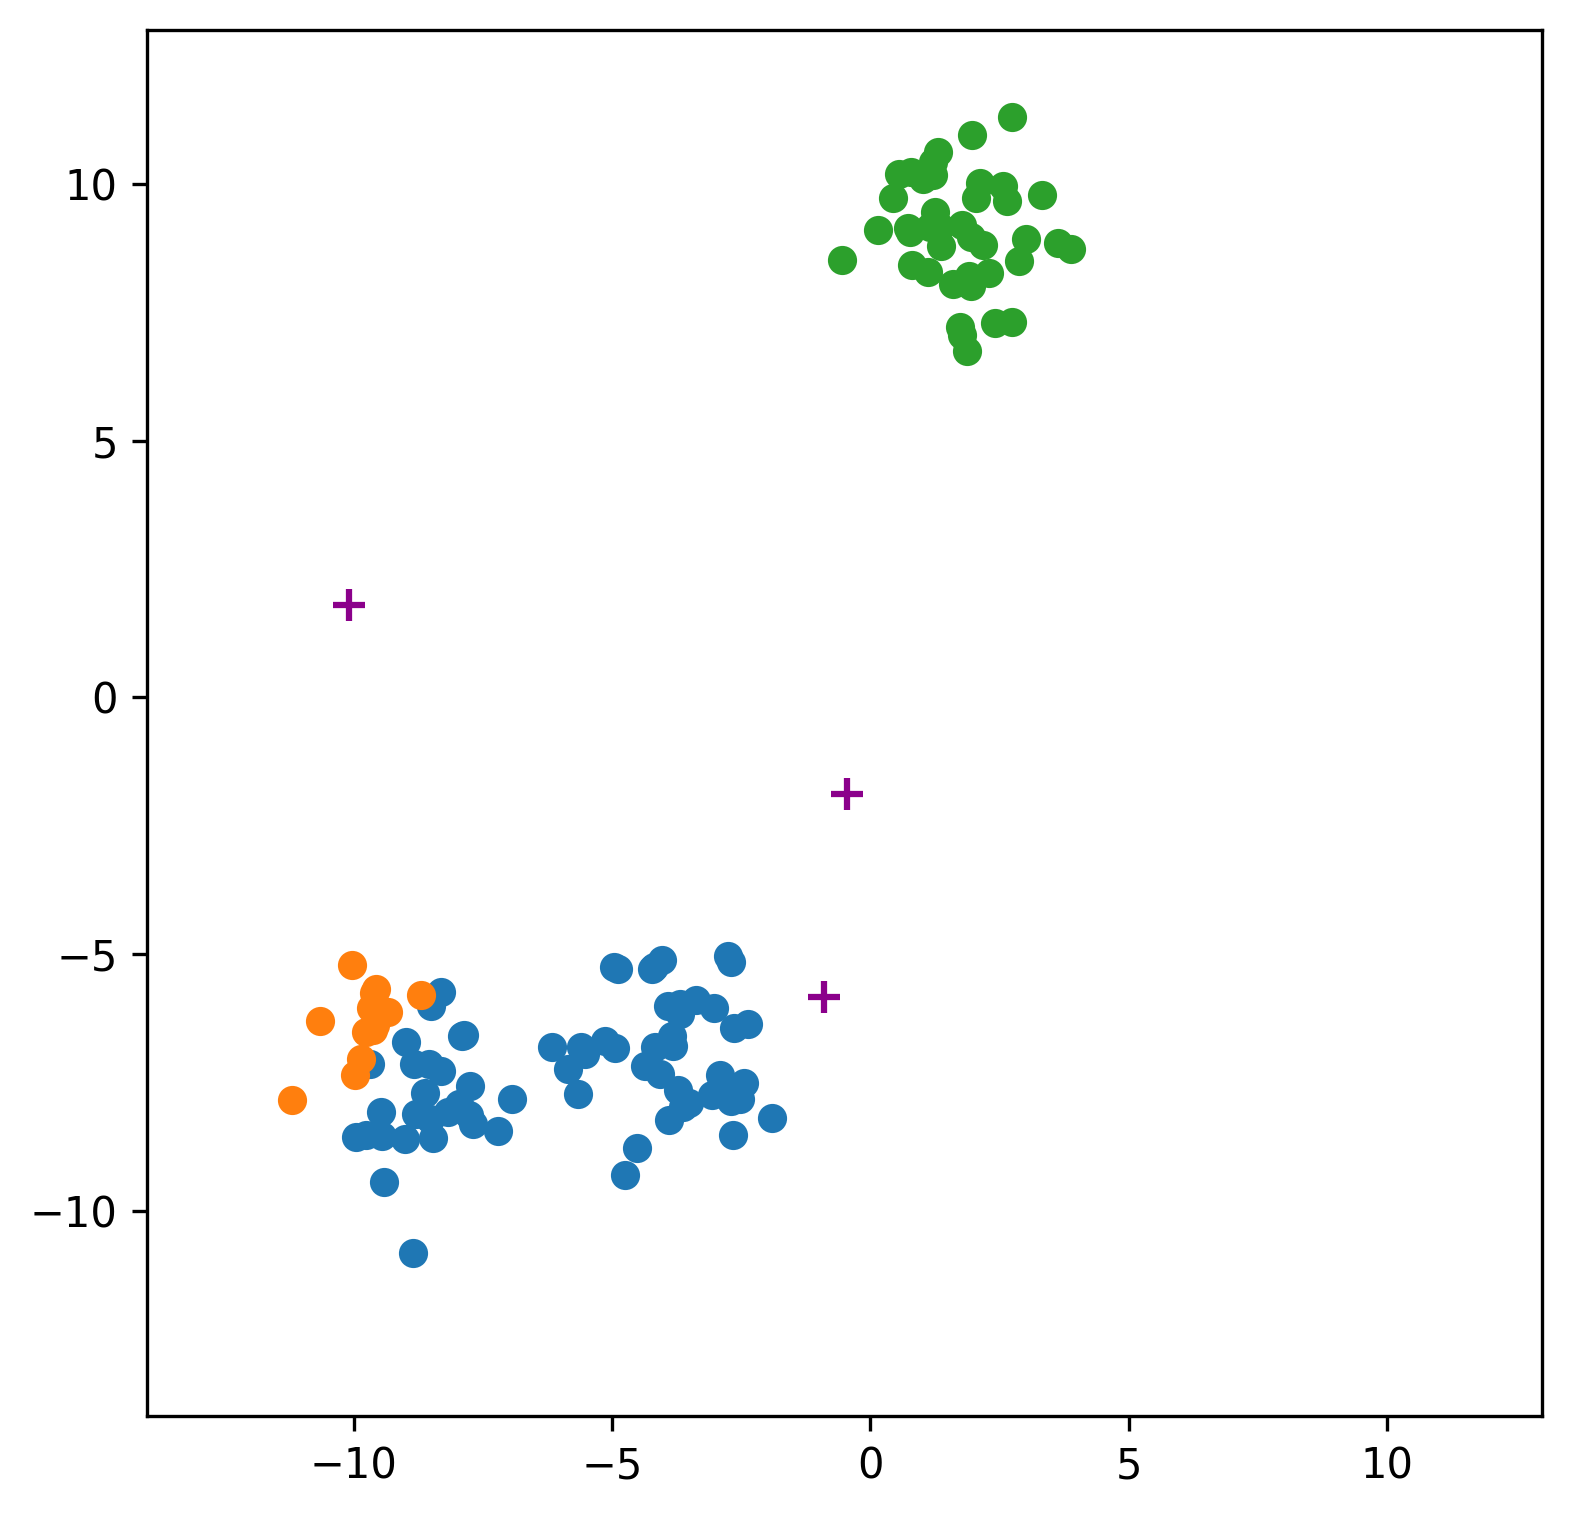

In [51]:
show_plot(X,clusters,centroids)

### Now for each cluster we want to compute the center of mass.

In [27]:
def comp_newcentroids(X,clusters):
  for c in clusters:
    centroids[c,:] = np.mean(X[clusters==c,:],axis=0)
  return centroids

In [28]:
# here we obtain the new centroids
new_centroids = comp_newcentroids(X,clusters)

In [29]:
# we can compute the distance between the old centroids and the new centroids
# here we can just use the Euclidean norm
np.sqrt(np.sum(new_centroids-centroids)**2)

0.0

In [30]:
d = []
for c in new_centroids:
  d.append(np.sqrt(np.sum((X-c)**2,axis=1)))


In [31]:
new_clusters = np.argmin(d,axis = 0)

In [32]:
new_clusters

array([2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1])

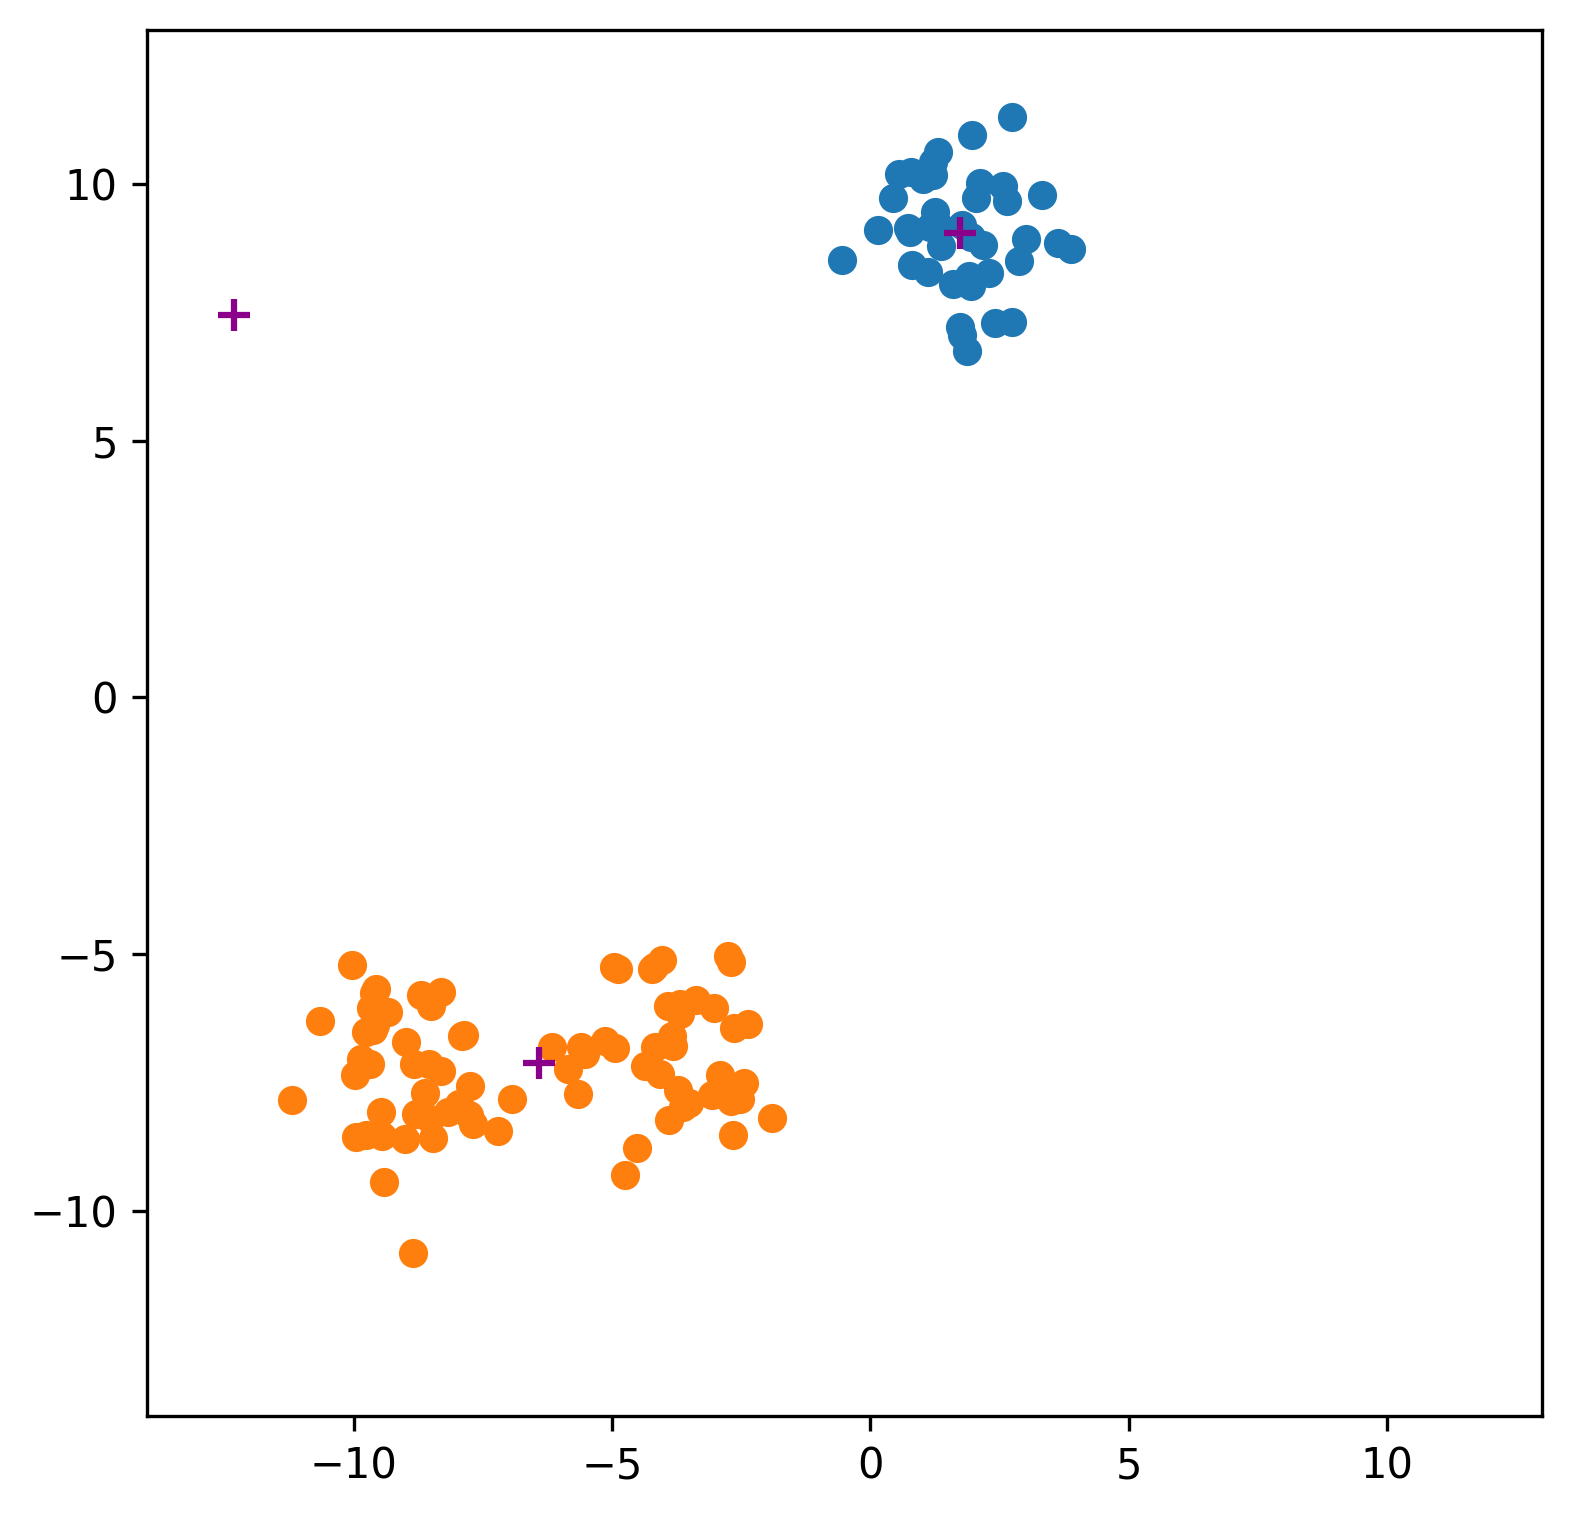

In [33]:
show_plot(X,new_clusters,new_centroids)

### Exercise: write your own k_Means Clustering Function

At the bare minimum the function will ingest the input features and a number of desired clusters 

In [34]:
centroids = comp_newcentroids(X,clusters)

In [35]:
centroids # here we see that the algorithm is stopping in the sense that there are no more significant updates

array([[-12.31050716,   7.44864715],
       [  1.74187823,   9.05027836],
       [ -6.41019074,  -7.12751829]])

In [36]:
d = []
for c in centroids:
  d.append(np.sqrt(np.sum((X-c)**2,axis=1)))

In [37]:
clusters = np.argmin(d,axis = 0)

In [38]:
clusters

array([2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1])

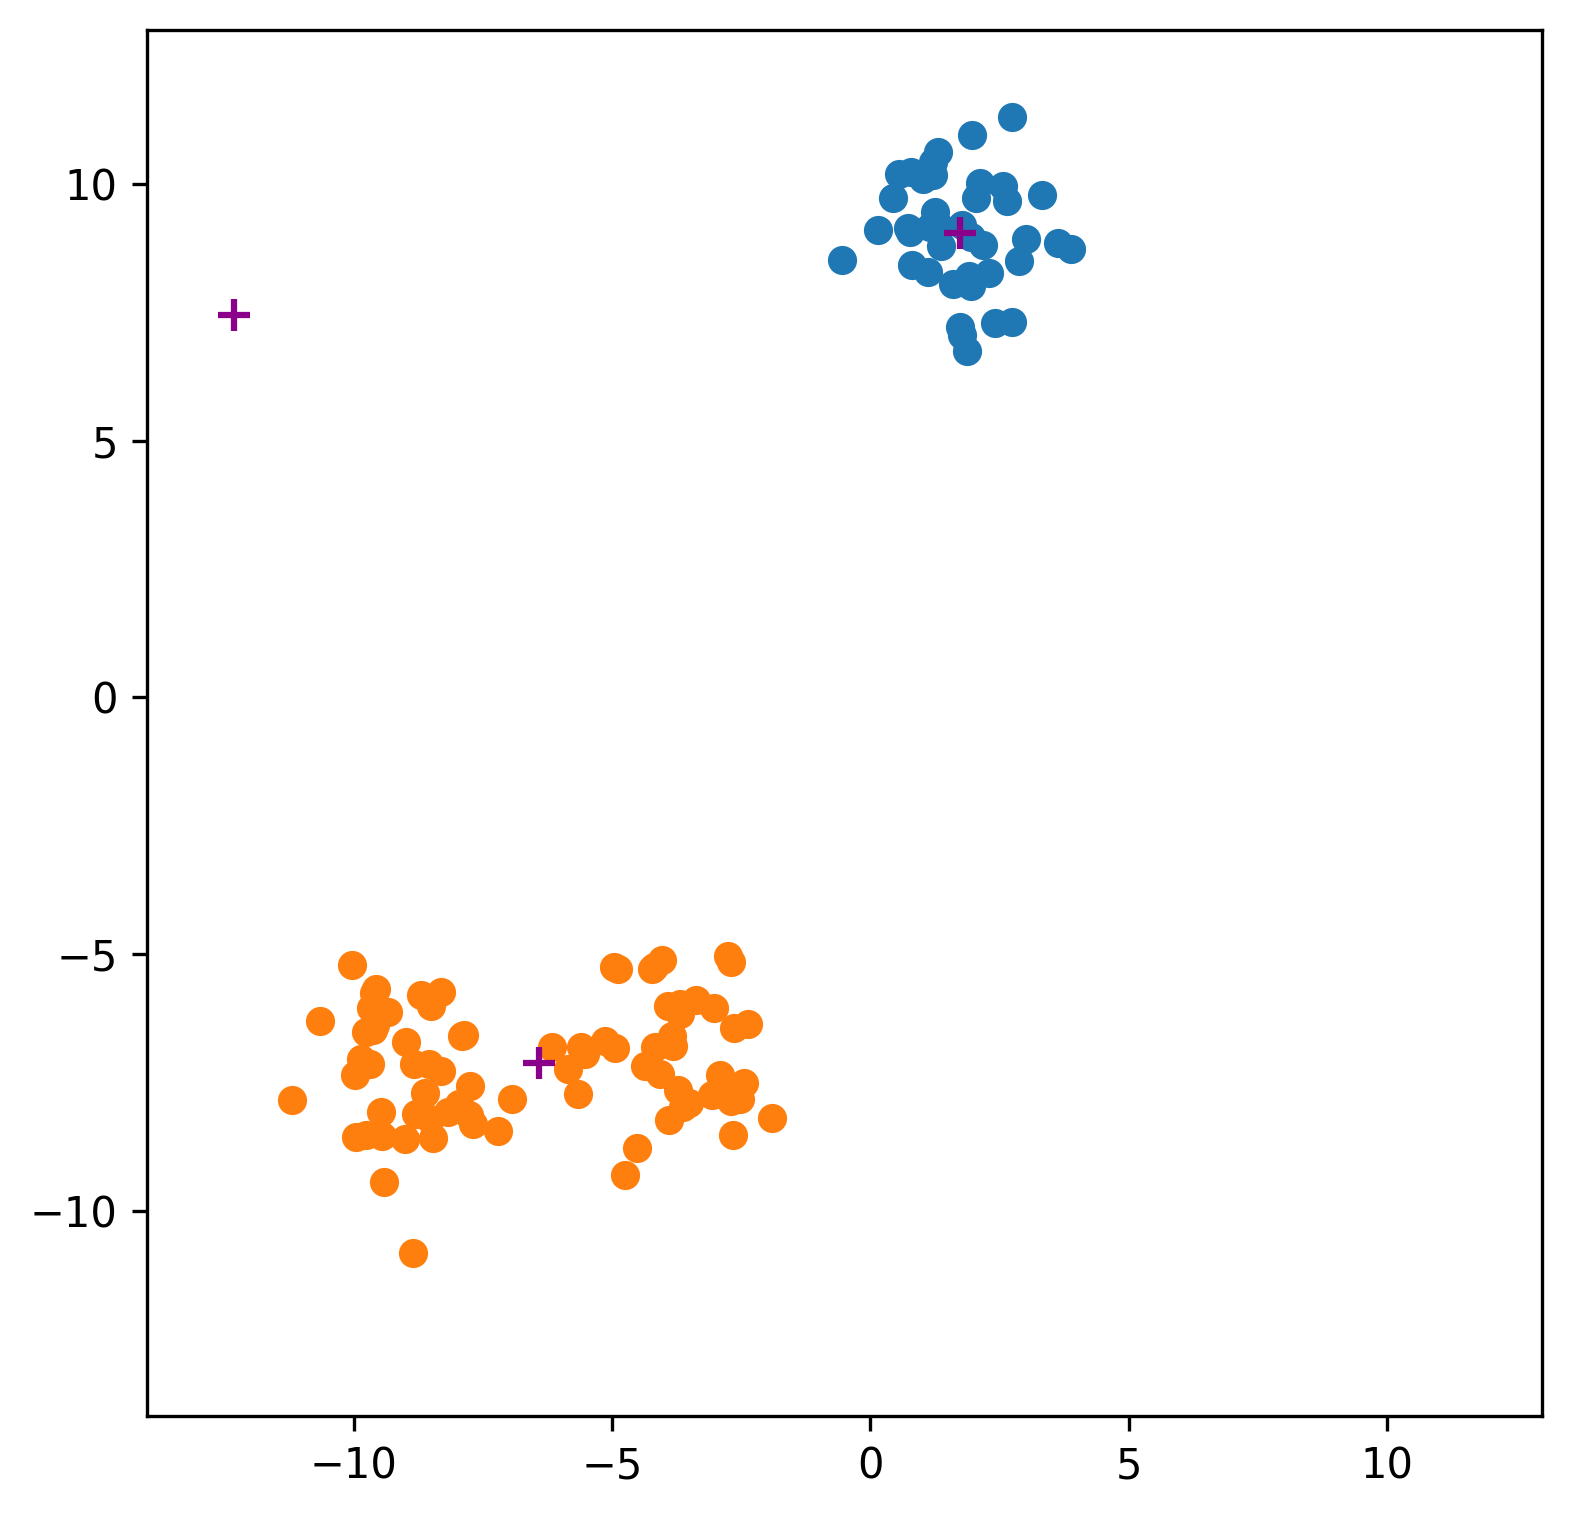

In [39]:
show_plot(X,clusters,centroids)

In [40]:
centroids = comp_newcentroids(X,clusters)

In [41]:
d = []
for c in centroids:
  d.append(np.sqrt(np.sum((X-c)**2,axis=1)))

In [42]:
clusters = np.argmin(d,axis = 0)

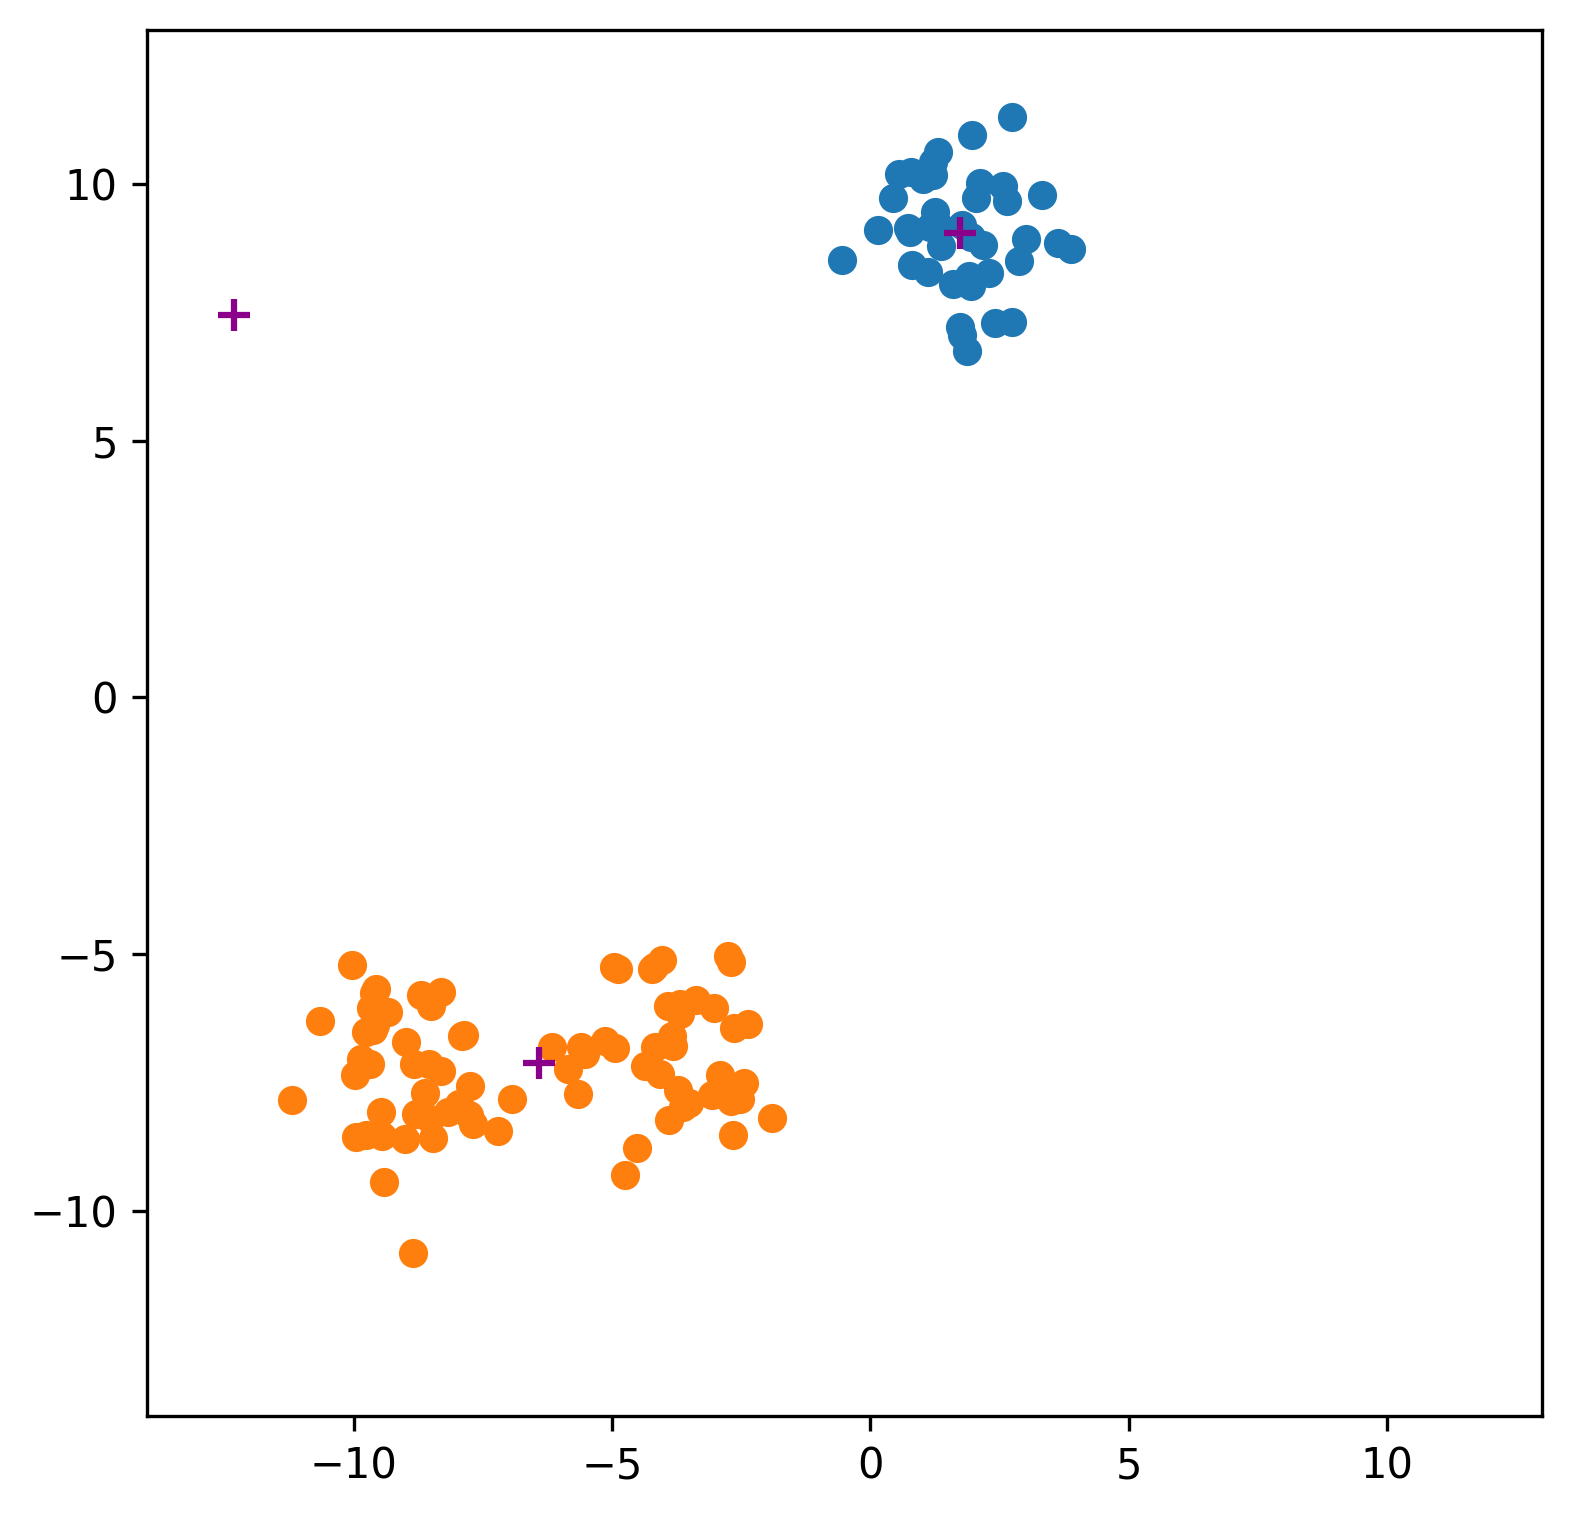

In [43]:
show_plot(X,clusters,centroids)

## <font size=6pt> K-means Function

In [ ]:
def get_clusters(X,iter,k,rs): # here we need to pay attention to the dimensionality of X
  # initiliaze the first set of centroids
  num = k
  ndim = X.shape[1]
  l = []
  centroids = np.zeros(shape=(num,ndim))
  r = np.random.RandomState(rs)
  # we need k centroids and each centroid must have ndim coordinates
  for nc in range(num):
    for j in range(ndim):
      l.append([np.min(X[:,j]),np.max(X[:,j])])
      centroids[nc,j] = r.uniform(l[j][0],l[j][1])

  # we compute all the pairwise distances to the first set of centroids
  for i in range(iter): # this is the actual loop 
    d = []
    for c in centroids:# 
      d.append(np.sqrt(np.sum((X-c)**2,axis=1)))
    # assign the first set of clusters
    clusters = np.argmin(d,axis = 0)
    # here we update the centroids
    centroids = comp_newcentroids(X,clusters,centroids)
  return centroids, clusters

In [52]:
# we can compare with the available SKLearn function
from sklearn.cluster import KMeans